<h2>IS453 Financial Analytics</h2><h2>Week 5 - Returns Distribution and Portfolio Analysis</h2>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import yfinance as yf
import statsmodels.api as sm

from scipy.stats import norm

#if compatibity problems force versions
#!pip install scipy==1.7.3
#!pip install numpy==1.22.4

## 1. Distribution of returns

### Generate a histograms with normal distribution plot 
Calculate daily returns for 2021 for 'AAPL', 'SPY', and 'TLT' and generate 
histograms with normal distribution plots to help answer the questions that follow.

Histograms can be generated using the plt.hist() method. <BR>
A normal distribution curve can be generated using the numpy.linspace() method.

**Get the price data and calculate percent returns**

In [22]:
# define function to get last trading day of year
def last_trading_day(year):
    return (pd.Timestamp(f'{year}-12-31') if pd.Timestamp(f'{year}-12-31').isoweekday() < 6 \
            else pd.Timestamp(f'{year}-12-31') - pd.offsets.BDay(1)).strftime('%Y-%m-%d')

In [23]:
# sample code
tickers = ['AAPL','SPY','TLT']

start_date = last_trading_day(2020)
end_date = '2022-01-01'

data1 = yf.download(tickers, start= start_date, end= end_date)

stock_prices = data1[['Adj Close']]
stocks_pct_chg = stock_prices['Adj Close'].pct_change().dropna()

stocks_pct_chg

[*********************100%%**********************]  3 of 3 completed


,AAPL,SPY,TLT
Date,,,
2021-01-04,-0.024719,-0.013614,-0.001205
2021-01-05,0.012364,0.006887,-0.007426
2021-01-06,-0.033661,0.005979,-0.020529
2021-01-07,0.034123,0.014857,-0.008814
2021-01-08,0.008631,0.005698,-0.003228
...,...,...,...
2021-12-27,0.022975,0.014152,0.002424
2021-12-28,-0.005767,-0.000817,-0.003962
2021-12-29,0.000502,0.001279,-0.010925


**Generate a histogram of stock returns distribution**

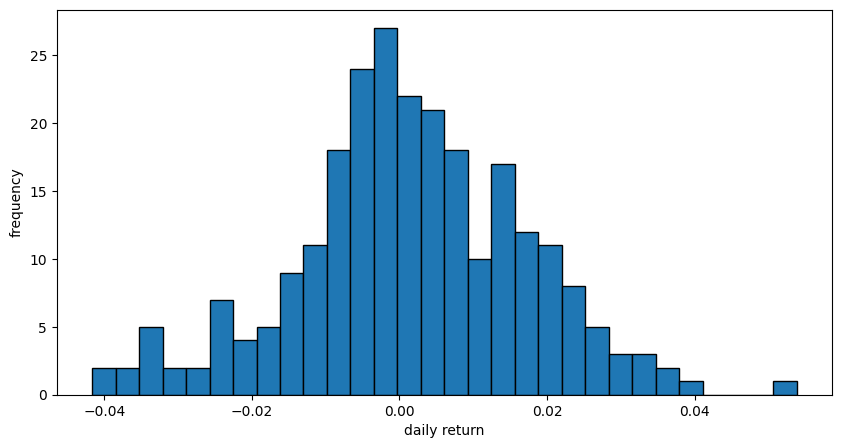

In [24]:
# sample code 
# generate AAPL histogram

bins = 30

# create histogram plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.hist(stocks_pct_chg['AAPL'], bins=bins, edgecolor='black', label='histogram')
ax.set_xlabel('daily return')
ax.set_ylabel('frequency')

plt.show()

**Plot the histogram with a normal distribution curve overlay**

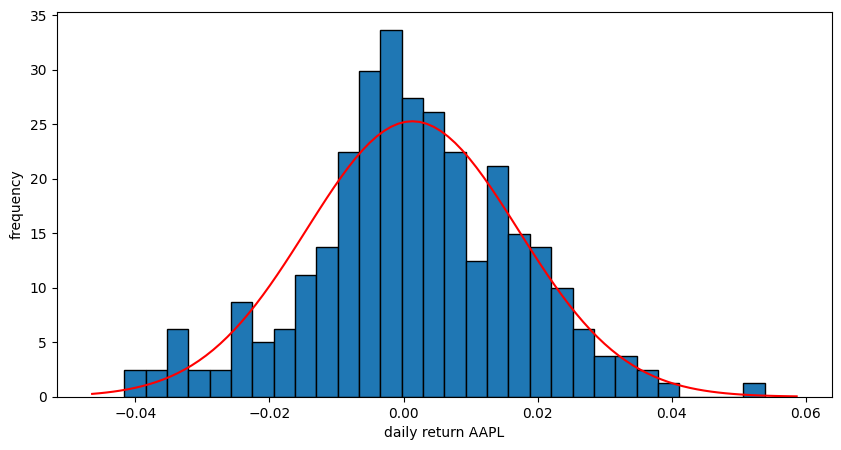

In [25]:
# sample code 

bins = 30

# create histogram plot
fig = plt.figure(figsize=(10,5))
plt.hist(stocks_pct_chg['AAPL'], bins=bins, edgecolor='black', label='histogram', density=True)
plt.xlabel('daily return AAPL')
plt.ylabel('frequency')

# calculate the normal PDF
mu, std = norm.fit(stocks_pct_chg['AAPL'])  
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 

# plot normal curve
plt.plot(x, p, color="r", label='normal')
plt.show()

**Follow the same steps to plot the distributions for SPY and TLT together with the fitted normal PDF**

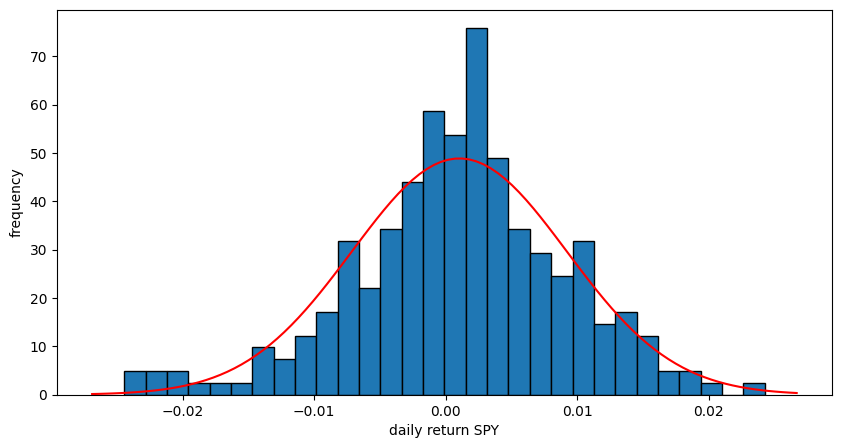

In [26]:
# your code here
# sample code 

bins = 30

# create histogram plot
fig = plt.figure(figsize=(10,5))
plt.hist(stocks_pct_chg['SPY'], bins=bins, edgecolor='black', label='histogram', density=True)
plt.xlabel('daily return SPY')
plt.ylabel('frequency')

# calculate the normal PDF
mu, std = norm.fit(stocks_pct_chg['SPY'])  
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 

# plot normal curve
plt.plot(x, p, color="r", label='normal')
plt.show()

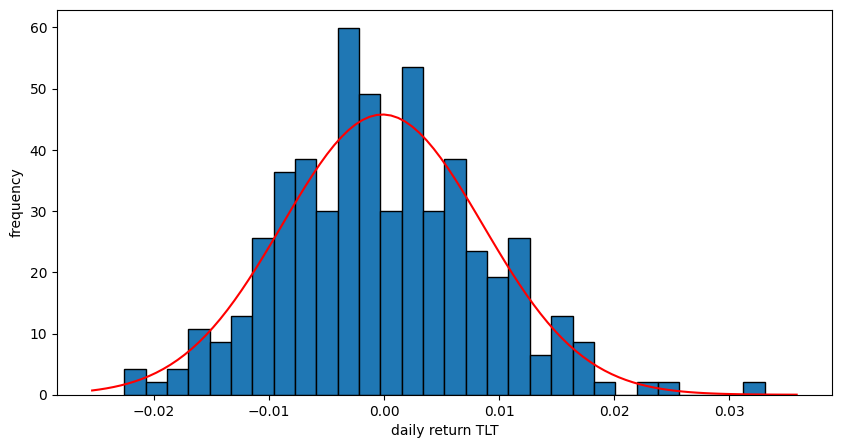

In [27]:
# sample code 

bins = 30

# create histogram plot
fig = plt.figure(figsize=(10,5))
plt.hist(stocks_pct_chg['TLT'], bins=bins, edgecolor='black', label='histogram', density=True)
plt.xlabel('daily return TLT')
plt.ylabel('frequency')

# calculate the normal PDF
mu, std = norm.fit(stocks_pct_chg['TLT'])  
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 

# plot normal curve
plt.plot(x, p, color="r", label='normal')
plt.show()

**Exercise Q1**

Based on visual inspection of the graphs, are the distributions: 

- Leptokurtic - with higher, sharper central peaks, and longer tails; or <br>
- Platokurtic - with lower central peaks, short tails?
- Or is it too difficult to tell?

Your answer here
- AAPL - leptokurtic
- SPY - leptokurtic
- TLT - leptokurtic

it is too difficult to tell

## 2. Kurtosis

Calculate the skew and kurtosis for the returns.

*Hint: use df.kurt(), note that the kurt() method returns 0 for a normal distribution.*

In [28]:
# your code here
stocks_pct_chg.kurt()


AAPL    0.366160
SPY     0.668615
TLT     0.420267
dtype: float64

**Exercise Qn 2**

Based on the calculated values

a. Are the distributions normal Gaussian, leptokurtic or platykurtic?<BR>
*Hint: refer to slides 6 and 7 in Module 5.1*
  
b. Which instrument has the greatest kurtosis? Which has the least?
  
c. If you analysed the same instruments' data for a longer period of time do you think the kurtois would increase, decrease, or stay the same? Why?



Your answer here

(a)
- AAPL - leptokurtic
- SPY - leptokurtic
- TLT - leptokurtic

(b) SPY has the greatest kurtosis of 0.668619
  
(c) Longer data period affect on kurtosis: increase, this might be due to an increased probability of extreme outliers being spotted 

**Let's compare the kurtosis for AAPL for 5 years versus the previous 1 year calculation.**

In [29]:
# sample code

tickers = ['AAPL']

start_date = last_trading_day(2016)
end_date = '2022-01-01'

data5y = yf.download(tickers, start= start_date, end= end_date)

stock_prices5y = data5y[['Adj Close']]
stocks_pct_chg5y = stock_prices5y['Adj Close'].pct_change().dropna()

print(f"5-year kurtosis: {stocks_pct_chg5y.kurt():.3}")

[*********************100%%**********************]  1 of 1 completed
5-year kurtosis: 6.66


## 3. Normal Q-Q Plot

To check if distribution is normal

Q-Q plot from statsmodels.api -<br>
https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

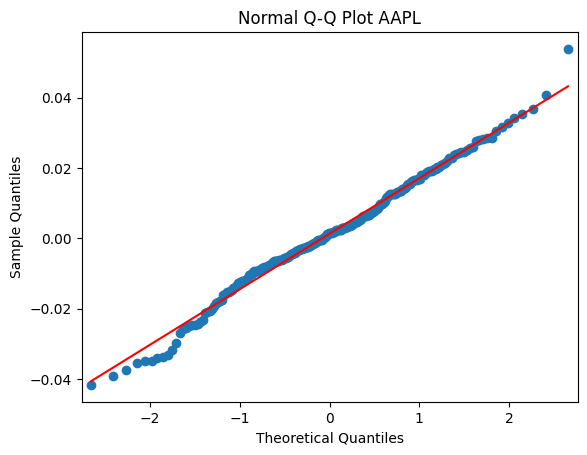

In [30]:
# sample code

sm.qqplot(stocks_pct_chg['AAPL'], line = 's')
plt.title('Normal Q-Q Plot AAPL')
plt.show()

Follow the same steps to plot the normal QQ plots for SPY and TLT.

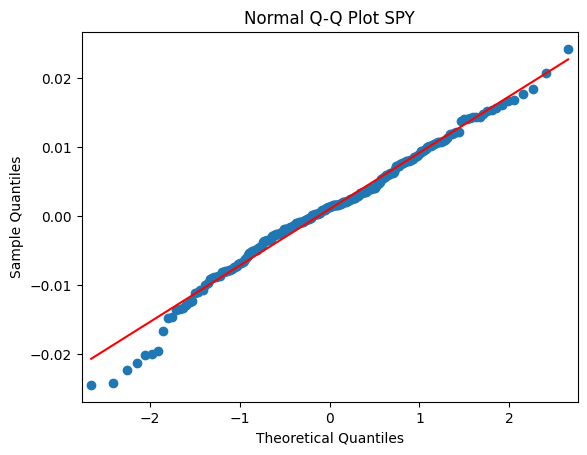

In [31]:
# your code here
sm.qqplot(stocks_pct_chg['SPY'], line = 's')
plt.title('Normal Q-Q Plot SPY')
plt.show()

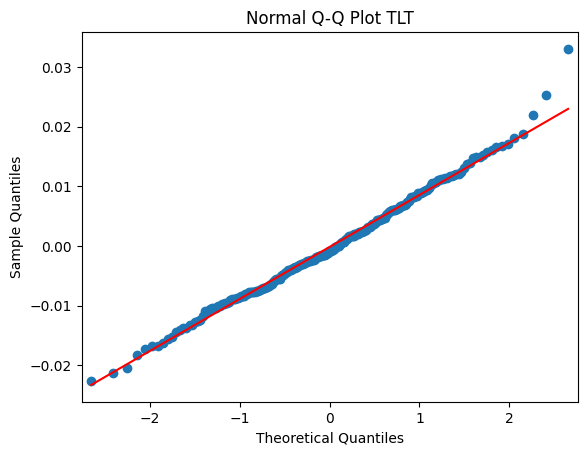

In [32]:
sm.qqplot(stocks_pct_chg['TLT'], line = 's')
plt.title('Normal Q-Q Plot TLT')
plt.show()

**Exercise Q3**

a) Do the normal QQ-plots show that the instruments distributions are normal, platokurtic, or leptokurtic?

*Hint: refer to slide 12 in Module 5.1*

b) For the ETFs' returns, do the outliers that vary from the normal distribution relate to gains or losses?

Your answer here
- SPY - losses (leptokurtic)
- TLT - gains (leptokurtic or normal... ig it seems more like leptokurtic due to the values deviating above the line at the right end)

# DYI

## 4. Diversification
Get the Adj Close prices for SPY, TLT, and EFA for 2-year period the last trading day before the start of Jan 2020 through Dec 2021.

Calculate the correlation for each fund against the rest.

In [33]:
# sample code

tickers = ['SPY','TLT', 'EFA']
start_date = last_trading_day(2019)
end_date = '2022-01-01'

data2 = yf.download(tickers, start= start_date, end= end_date)

stock_prices2 = data2[['Adj Close']]
stock_prices2 = stock_prices2['Adj Close']
pct_returns = stock_prices2.pct_change().dropna()

correlation = pct_returns.corr()
print(correlation.round(3))


[*********************100%%**********************]  3 of 3 completed
       EFA    SPY    TLT
EFA  1.000  0.908 -0.386
SPY  0.908  1.000 -0.402
TLT -0.386 -0.402  1.000


**DYI Q1: Measure correlations**
- Which funds have the highest correlation?
- Which funds are negatively correlated?

Your answer here

highest correlation - SPY and EFA at corr of 0.908

negatively correlated - TLT and SPY (-0.402), TLT and EFA (-0.386)

### Calculate metrics for each individual fund EFA, SPY, and TLT
  
Assume daily risk free rate of 0.0001

Calculate the following metrics
- annualized return
- annualized volatility
- annualized Sharpe ratio
- kurtosis

Use the standard devivation (sqrt of the variance) of the daily percentage returns to calculate the annualized volatility.

*Hint: Refer to formulas from class notes or previous labs*

In [34]:
stock_prices2 

,EFA,SPY,TLT
Date,,,
2019-12-31,60.127384,298.404266,118.811127
2020-01-02,60.733509,301.194916,120.152916
2020-01-03,59.980179,298.914185,122.003319
2020-01-06,60.213982,300.054504,121.310524
2020-01-07,60.049458,299.210907,120.714180
...,...,...,...
2021-12-27,72.352753,456.750977,134.545441
2021-12-28,72.380188,456.377747,134.012207
2021-12-29,72.352753,456.961517,132.548248


In [61]:
# your code here
daily_risk_free_rate = 0.0001

# period return = (ending price - starting price)/starting price
# ARR = (1+period return)^(1/N) - 1) where N = number of years

period_ret = (stock_prices2.iloc[-1] - stock_prices2.iloc[0]) / stock_prices2.iloc[0]

annualized_returns = (1 + period_ret)**(1/2) -1
print("Annualised returns for the 3 stocks:")
print(annualized_returns.map(lambda x: f"{x:.2%}"))
# this also works since the last value of the row in cum return series is the period return 
# cum_ret_series = (1 + pct_returns).cumprod() - 1
# annualized_returns = (1 + cum_ret_series.iloc[-1])**(1/2) -1
# annualized_returns


hv = np.log(stock_prices2/stock_prices2.shift(1)).std()
ann_volatilities = hv * np.sqrt(252)
print("Annualised volatilities for the 3 stocks:")
print(ann_volatilities.map(lambda x: f"{x:.2%}"))


avg_daily_ret = pct_returns.mean()
stocks_df_RAR = pd.DataFrame(pct_returns)
stocks_df_RAR['RiskFree_Rate'] = daily_risk_free_rate
avg_rf_ret = stocks_df_RAR['RiskFree_Rate'].mean()
stocks_df_RAR['Excess_ret_SPY'] = stocks_df_RAR["SPY"] - stocks_df_RAR['RiskFree_Rate']
stocks_df_RAR['Excess_ret_TLT'] = stocks_df_RAR["TLT"] - stocks_df_RAR['RiskFree_Rate']
stocks_df_RAR['Excess_ret_EFA'] = stocks_df_RAR["EFA"] - stocks_df_RAR['RiskFree_Rate']

# the constructed df for RAR calculations
print(stocks_df_RAR)
# calculate sharpe ratio for SPY
sharpe_SPY = (avg_daily_ret['SPY'] - avg_rf_ret)/stocks_df_RAR['Excess_ret_SPY'].std()
ann_sharpe_SPY = sharpe_SPY * np.sqrt(252)
print(f'Annualised Sharpe Ratio SPY = {ann_sharpe_SPY:.3f}')
# calculate sharpe ratio for TLT
sharpe_TLT = (avg_daily_ret['TLT'] - avg_rf_ret)/stocks_df_RAR['Excess_ret_TLT'].std()
ann_sharpe_TLT = sharpe_TLT * np.sqrt(252)
print(f'Annualised Sharpe Ratio TLT = {ann_sharpe_TLT:.3f}')
# calculate sharpe ratio for EFA
EFA = (avg_daily_ret['EFA'] - avg_rf_ret)/stocks_df_RAR['Excess_ret_EFA'].std()
ann_EFA = EFA * np.sqrt(252)
print(f'Annualised Sharpe Ratio EFA = {ann_EFA:.3f}')



Annualised returns for the 3 stocks:
EFA     9.50%
SPY    23.42%
TLT     6.17%
dtype: object
Annualised volatilities for the 3 stocks:
EFA    24.09%
SPY    25.50%
TLT    18.09%
dtype: object
                 EFA       SPY       TLT  RiskFree_Rate  Excess_ret_SPY  \
Date                                                                      
2020-01-02  0.010081  0.009352  0.011293         0.0001        0.009252   
2020-01-03 -0.012404 -0.007572  0.015400         0.0001       -0.007672   
2020-01-06  0.003898  0.003815 -0.005678         0.0001        0.003715   
2020-01-07 -0.002732 -0.002811 -0.004916         0.0001       -0.002911   
2020-01-08  0.002884  0.005329 -0.006611         0.0001        0.005229   
...              ...       ...       ...            ...             ...   
2021-12-27  0.007770  0.014152  0.002424         0.0001        0.014052   
2021-12-28  0.000379 -0.000817 -0.003963         0.0001       -0.000917   
2021-12-29 -0.000379  0.001279 -0.010924         0.0001    

In [36]:
kurtosis = stock_prices2.pct_change().dropna().kurt()
print("kurtosis results:")
print(kurtosis)

kurtosis results:
EFA    14.373652
SPY    12.587228
TLT     9.843011
dtype: float64


**DIY Q2:**<br>
- Which fund has the highest return?
- Which fund has the lowest return?
- Which fund has the highest volatility?
- Which fund has the lowest volatility?
- Which fund has the highest Sharpe ratio? 
- Which fund has the lowest Sharpe ratio? 

Your answer

- highest returns - SPY
- lowest returns - TLT
- highest volatility - SPY
- lowest volatility - TLT
- highest Sharpe ratio - SPY
- lowest Sharpe ratio - TLT

### Calculate portfolio returns
Portfolio 1: 50% SPY and 50% TLT <br>

Create a combined portfolio of 50/50 mix.

In [53]:
# sample code

# start with percent returns series
pct_returns = stock_prices2.pct_change().dropna()

#  check the order of the columns
pct_returns.columns

Index(['EFA', 'SPY', 'TLT'], dtype='object')

In [54]:
# sample code

# define portfolio weights
# this corresponds to order of the columns in the returns df
# 'EFA', 'SPY', 'TLT'
portfolio_weights = [0, 0.5, 0.5] 

# apply the weights to returns
wt_portfolio_ret = pct_returns * portfolio_weights

# add up the 50/50 column returns into single column
portfolio_returns1 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns1.rename(columns={portfolio_returns1.columns[0]:'Portfolio'}, inplace= 'True')
portfolio_returns1

,Portfolio
Date,
2020-01-02,0.010323
2020-01-03,0.003914
2020-01-06,-0.000932
2020-01-07,-0.003864
2020-01-08,-0.000641
...,...
2021-12-27,0.008288
2021-12-28,-0.002390
2021-12-29,-0.004822


### Calculate metrics for Portfolio 1: 50% SPY and 50% TLT
  Assume daily risk free rate of 0.0001
  
  Calculate the following metrics for the 50/50 SPY/TLT portfolio
  - annualized return
  - annualized volatility
  - Sharpe ratio
  - kurtosis

In [55]:
# your code here

#hint: generate the cumlative return to determine the period return
cum_ret_series = (1 + portfolio_returns1).cumprod() - 1
annualized_returns = (1 + cum_ret_series.iloc[-1])**(1/2) -1
print("annualised returns")
print(annualized_returns.map(lambda x: f"{x:.2%}"))

ann_volatility = portfolio_returns1.std() * np.sqrt(252) # cuz this is working with the percentage returns alr 
print("annualised volatility")
print(ann_volatility.map(lambda x: f"{x:.2%}"))

rf_daily = 0.0001
sharpe_ratio = (annualized_returns - rf_daily * 252) / ann_volatility
print("sharpe ratio")
print(sharpe_ratio)

# Calculate kurtosis
kurtosis = portfolio_returns1.kurtosis()
print("kurtosis")
print(kurtosis)



annualised returns
Portfolio    16.41%
Name: 2021-12-31 00:00:00, dtype: object
annualised volatility
Portfolio    12.26%
dtype: object
sharpe ratio
Portfolio    1.132752
dtype: float64
kurtosis
Portfolio    10.544834
dtype: float64


**DIY Q3:**<br>
  How do the metrics compare between the portfolio and its component funds?

Your answer

for the individual stocks: 
Annualised returns for the 3 stocks:
EFA     9.50%
SPY    23.42%
TLT     6.17%
Annualised volatilities for the 3 stocks:
EFA    24.09%
SPY    25.50%
TLT    18.09%
Annualised Sharpe Ratio SPY = 0.857
Annualised Sharpe Ratio TLT = 0.281
Annualised Sharpe Ratio EFA = 0.395
kurtosis results:
EFA    14.373652
SPY    12.587228
TLT     9.843011

The portfolio annualised returns are kind of averaged out and the volatility is much lesser as compared to each individual ones. 

The Sharpe ratio has also improved and broke out of 1

The kurtosis is also averaged out at 10.5.

### Calculate metrics for Portfolio 2: 50% SPY and 50% EFA
  Assume daily risk free rate of 0.0001
  
  Calculate the following metrics for the 50/50 SPY/EFA portfolio
  - annualized return
  - annualized volatility
  - annualized Sharpe ratio
  - kurtosis

In [56]:
# sample code

# start with percent returns series
pct_returns = stock_prices2.pct_change().dropna()

#  check the order of the columns
pct_returns.columns

# sample code

# define portfolio weights
# this corresponds to order of the columns in the returns df
# 'EFA', 'SPY', 'TLT'
portfolio_weights = [0.5, 0.5, 0] 

# apply the weights to returns
wt_portfolio_ret = pct_returns * portfolio_weights

# add up the 50/50 column returns into single column
portfolio_returns2 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns2.rename(columns={portfolio_returns2.columns[0]:'Portfolio 2'}, inplace= 'True')
portfolio_returns2

,Portfolio 2
Date,
2020-01-02,0.009716
2020-01-03,-0.009988
2020-01-06,0.003856
2020-01-07,-0.002772
2020-01-08,0.004107
...,...
2021-12-27,0.010961
2021-12-28,-0.000219
2021-12-29,0.000450


In [57]:
# your code here

#hint: generate the cumlative return to determine the period return
cum_ret_series = (1 + portfolio_returns2).cumprod() - 1
annualized_returns = (1 + cum_ret_series.iloc[-1])**(1/2) -1
print("annualised returns")
print(annualized_returns.map(lambda x: f"{x:.2%}"))

ann_volatility = portfolio_returns2.std() * np.sqrt(252) # cuz this is working with the percentage returns alr 
print("annualised volatility")
print(ann_volatility.map(lambda x: f"{x:.2%}"))

rf_daily = 0.0001
sharpe_ratio = (annualized_returns - rf_daily * 252) / ann_volatility
print("sharpe ratio")
print(sharpe_ratio)

# Calculate kurtosis
kurtosis = portfolio_returns2.kurtosis()
print("kurtosis")
print(kurtosis)

annualised returns
Portfolio 2    16.42%
Name: 2021-12-31 00:00:00, dtype: object
annualised volatility
Portfolio 2    24.00%
dtype: object
sharpe ratio
Portfolio 2    0.579148
dtype: float64
kurtosis
Portfolio 2    14.342643
dtype: float64


### Calculate metrics for Portfolio 3: 1/3 in SPY, 1/3 in TLT, 1/3 in EFA
  Assume daily risk free rate of 0.0001

  Calculate the following metrics for the portfolio
  - annualized return
  - annualized volatility
  - annualized Sharpe ratio
  - kurtosis


In [58]:
# sample code

# start with percent returns series
pct_returns = stock_prices2.pct_change().dropna()

#  check the order of the columns
pct_returns.columns

# sample code

# define portfolio weights
# this corresponds to order of the columns in the returns df
# 'EFA', 'SPY', 'TLT'
portfolio_weights = [1/3, 1/3, 1/3] 

# apply the weights to returns
wt_portfolio_ret = pct_returns * portfolio_weights

# add up the 50/50 column returns into single column
portfolio_returns3 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns3.rename(columns={portfolio_returns3.columns[0]:'Portfolio 3'}, inplace= 'True')
portfolio_returns3

,Portfolio 3
Date,
2020-01-02,0.010242
2020-01-03,-0.001525
2020-01-06,0.000678
2020-01-07,-0.003487
2020-01-08,0.000534
...,...
2021-12-27,0.008115
2021-12-28,-0.001467
2021-12-29,-0.003341


In [59]:
# your code here

#hint: generate the cumlative return to determine the period return
cum_ret_series = (1 + portfolio_returns3).cumprod() - 1
annualized_returns = (1 + cum_ret_series.iloc[-1])**(1/2) -1
print("annualised returns")
print(annualized_returns.map(lambda x: f"{x:.2%}"))

ann_volatility = portfolio_returns3.std() * np.sqrt(252) # cuz this is working with the percentage returns alr 
print("annualised volatility")
print(ann_volatility.map(lambda x: f"{x:.2%}"))

rf_daily = 0.0001
sharpe_ratio = (annualized_returns - rf_daily * 252) / ann_volatility
print("sharpe ratio")
print(sharpe_ratio)

# Calculate kurtosis
kurtosis = portfolio_returns3.kurtosis()
print("kurtosis")
print(kurtosis)

annualised returns
Portfolio 3    14.50%
Name: 2021-12-31 00:00:00, dtype: object
annualised volatility
Portfolio 3    14.65%
dtype: object
sharpe ratio
Portfolio 3    0.817744
dtype: float64
kurtosis
Portfolio 3    14.166177
dtype: float64


**DIY Q4:**<br>
- Which portfolio has the highest return?
- Which portfolio has the lowest volatility?
- Which portfolio has the highest Sharpe ratio?  

Your answer

- highest return : 50% SPY, 50% EFA at 16.42%
- lowest volatility :  50% SPY, 50% TLT at 12.26%
- highest Sharpe ratio : 50% SPY, 50% TLT at 1.132752

### Create a better portfolio
Come up with different weighting that has a higher Sharpe ratio than all the other portfolios.

Assume daily risk free rate of 0.0001


In [47]:
#your code here
# Define optimized portfolio weights
optimized_weights = [0, 0.7, 0.3]  # 70% TLT, 30% SPY (EFA removed for higher Sharpe ratio)

# Apply the optimized weights to the returns
wt_optimized_portfolio_ret = pct_returns * optimized_weights

# Sum up weighted returns into a single column
optimized_portfolio_returns = pd.DataFrame(wt_optimized_portfolio_ret.sum(axis=1), columns=['Portfolio'])

# Generate cumulative return series
cum_ret_series_optimized = (1 + optimized_portfolio_returns).cumprod()

# Annualized return
period_return_optimized = cum_ret_series_optimized.iloc[-1] - 1  # Total return over 2 years
annualized_returns_optimized = (1 + period_return_optimized) ** (1/2) - 1  # Since it's a 2-year period

# Annualized volatility
ann_volatility_optimized = optimized_portfolio_returns.std() * np.sqrt(252)

# Sharpe ratio (assuming risk-free rate = 0.0001 daily)
rf_daily = 0.0001
sharpe_ratio_optimized = (annualized_returns_optimized - rf_daily * 252) / ann_volatility_optimized

# Print optimized results
print("Optimized Portfolio Weights:", optimized_weights)
print("Annualized Return:", annualized_returns_optimized.map(lambda x: f"{x:.2%}"))
print("Annualized Volatility:", ann_volatility_optimized.map(lambda x: f"{x:.2%}"))
print("Sharpe Ratio:", sharpe_ratio_optimized)


Optimized Portfolio Weights: [0, 0.7, 0.3]
Annualized Return: Portfolio    19.65%
Name: 2021-12-31 00:00:00, dtype: object
Annualized Volatility: Portfolio    16.33%
dtype: object
Sharpe Ratio: Portfolio    1.049368
dtype: float64


**DIY Q5:**<br>
- What is the mix you chose and the corresponding Sharpe ratio?
- How did you decide which funds to increase or reduce the weightings?
- Why is adding EFA be poor choice for improving the the RAR of the SPY/TLT portfolio? 

Your answer

1. Choosing the Mix for the Highest Sharpe Ratio:
SPY and TLT are likely to provide higher returns than EFA, which has historically been more volatile and less stable.
TLT (long-term treasuries) tends to have a negative correlation with SPY (stocks), making it a good hedging asset. Adding more TLT could reduce portfolio volatility while maintaining returns.
EFA is an international stock index and can introduce higher volatility, especially when global markets are unstable. It might not significantly improve returns in a portfolio already containing SPY.
2. How to Decide the Mix:
Sharpe Ratio Maximization: A higher Sharpe ratio comes from a mix that maximizes returns while minimizing risk. TLT's lower volatility can help balance SPY's higher volatility, so you might increase the weight in TLT to reduce the overall portfolio risk.
By adjusting weights, we want to find the combination where the increase in return outweighs the increase in risk, leading to a higher Sharpe ratio.
3. Reason for Poor Choice of Adding EFA:
EFA (International Stocks) introduces additional volatility due to factors like currency risk, geopolitical risk, and economic instability in international markets.
If your portfolio is already dominated by SPY and TLT, adding EFA could increase the volatility without significantly improving the return. This reduces the risk-adjusted return (RAR) of the portfolio.
SPY already captures a broad equity exposure (U.S. stocks), and adding EFA could introduce diversification that is not highly beneficial in terms of improving the risk-return profile, especially if the weights of SPY and TLT are optimized.